![header%20ipynb.png](attachment:header%20ipynb.png)

# Hands-On
---

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Tugas Mandiri Pertemuan 16
---
Pertemuan 16 (enambelas) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Membangun model: Evaluasi. silakan Anda kerjakan Latihan 1 s/d 5. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

<h1> Soal 1: Pemahaman Tentang Model Evaluasi</h1>

Jawab pertanyaan di bawah ini dengan bahasa masing-masing?

1. Apa perbedaan antara data latih, data validasi, dan data test?
2. Bagaimana cara kita menilai performa suatu model?
3. Apa itu Confusion Matrix? Jelaskan secara lengkap!
4. Apa itu Classification Report dari sklearn?


 <p style="color:#FF0000">Jawab: </p>

 




1.Secara umum data dibagi menjadi 3 bagian , yaitu data latih,data validasi dan data test.
 Perbedaannya :
<p>-Data latih atau biasa disebut dengan training data merupakan bagian data yang digunakan saat melatih model</p>
<p>- Data validasi atau validation data merupakan data yang digunakan untuk mengevaluasi model yang telah dilatih dengan training data, dengan menguji model yang telah dilatih menggunakan validation data, perfoma model-model dengan hyperparameter berbeda akan dibandingkan dan diketahui hyperpara meter mana yang menyebabkan underfitting, overfitting dan yang menghasilkan fit model terbaik. </p>
<p>-Sedangkan Data test digunkan untuk menguji perfoma suatu algoritma pembelajaran mesin  satu dengan yang lainya, Namun dalam beberapa literatur, data validasi sering dianggap sama dengan data uji</p>

2.Cara kita menilai perfoma suatu model yang dibangun makan diperlukan parameter evaluasi, Terdapat beberapa parameter evaluasi  berdasarkan jenis teksnya, yaitu:
<p> 1. Task klasifikasi:beberapa paremater evaluasi anatara lain ada Akurasi, Presisi, Recal/Sensitivity,F1-measure</p>
<p> 2. Task regresi:beberapa parameter evaluasinya ada MSE(Mean Squared Error), MAPE(Mean Absolute Percentage Error </p>
<p>3. Task klastering:beberapa parameter evaluasi ada Silhoette Score,Davies-Bouldin Index  </p>


<p> 3. Confusion Matrix Adalah tabulasi detil yang menggambarkan hasil klasifikasi pada suatu model, Untuk setiap percobaan hasil klasifikasi dicatat dengan memperhatikan kelas yang sesunggunya dengan hasil percobaan yang dilakukan. Tabulasi melalui confusion matrix dapat menyajikan akurasi secara lebih baik, walaupun hasil akurasi akhir tetap berdasarkan kepada banyaknya percobaan valid terhadap total percobaan yang dilakukan. Hasil Klasifikasi yang benar untuk tiap kelas berada tepat di diagonal matriks. Sedangkan distribusi kesalahan klasifikasi dapat dilihat di bagian selain diagonal.</p>

<p> 4.Classification report menunjukkan detail dari precision, recall & f1-scores,mencetak biner klasifikasi sebagai penentuan True Positive, False Positive</p>

---

<h1>Soal 2: Aplikasi Model Evaluasi</h1>

Kali ini kita akan menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payudara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

Lebih Lengkapnya kalian bisa membaca informasi tentang dataset di link berikut: https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

Buat model Klasifikasi (Model/Algoritma Bebas) untuk memprediksi status pasien dengan ketentuan sebagai berikut:

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
3. Pelajar tentang metrics roc_auc_score kemudian buatlah model dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'. Baca https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html untuk menggunakan metric roc_auc saat cross-validation.
3. Berapa score rata2 dari model dengan teknik cross-validation tersebut?<p>Jawab: 0.6903477711901624</p>
4. Prediksi data test dengan model yang telah kalian buat!<p>Jawab: 0.5311403508771929 </p>
5. Bagaimana hasil confusion matrix dari hasil prediksi tersebut?<p>Jawab: array ([[52,  5],</p>
     <p>        [17,  3]]) </p>
6. Bagaimana classification report dari hasil prediksi tersebut?
5. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?
6. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?

### Load Dataset 

In [10]:
# import library pandas
import pandas as pd

# Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [11]:
# tampilkan 5 baris awal dataset dengan function head()
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [12]:
# hitung jumlah masing" data pada kolom survival_status
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### Build Model

In [13]:
#import library train test split dan cross val
from sklearn.model_selection import train_test_split, cross_val_score

#import library Logistic regression
from sklearn.linear_model import LogisticRegression

#import library roc auc score
from sklearn.metrics import roc_auc_score

#import library scale
from sklearn.preprocessing import scale

#import library numpy
import numpy as np

In [14]:
## pemisahan feature dan target (data target : 'survival_status')
X = df.drop('survival_status', axis = 1)
Xs = scale(X)
y = df['survival_status']

#### NO 1

In [15]:
## pemisahan variabel test dan train dari data Xs dan y
# test size= 25%, random state = 42, dan stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [16]:
## pembuatan objek model
model_logReg = LogisticRegression(random_state = 42)

## latih model
model_logReg.fit(X_train, y_train)

## prediksi.
y_predict = model_logReg.predict(X_test)

#### NO 2

In [17]:
## menghitung cross_val_score dengan scoring = 'roc_auc'
## parameter cv = 10 
score = cross_val_score(model_logReg, X, y, scoring = 'roc_auc', cv = 10)
print(score)

[0.44021739 0.80978261 0.67391304 0.69021739 0.70380435 0.79292929
 0.875      0.62784091 0.67613636 0.61363636]


#### NO 3

In [18]:
# cetak rata-rata nilai rata-rata auc score
score.mean()

0.6903477711901624

#### NO 4

In [19]:
# Prediksi data test dengan model yang telah kalian buat 
auc_score = roc_auc_score(y_test, y_predict)
auc_score

0.5311403508771929

#### NO 5

In [20]:
# import library confusion matrix dan classification report
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# apply confusion matrix dan cetak nilai confusion matrix
cm = confusion_matrix(y_test, y_predict, labels = (1,2))
cm

array([[52,  5],
       [17,  3]])

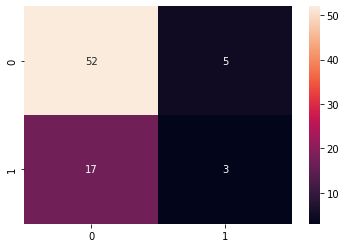

In [22]:
# visualisasikan nilai confusion matrix ke dalam diagram heatmap
import seaborn as sns
sns.heatmap(cm, annot=True)

#### NO 6

In [23]:
# cetak nilai classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.75      0.91      0.83        57
           2       0.38      0.15      0.21        20

    accuracy                           0.71        77
   macro avg       0.56      0.53      0.52        77
weighted avg       0.66      0.71      0.67        77



#### NO 7

- Bagaimana hasil confusion matrix dari hasil prediksi tersebut? <br>
 *jawab disini* dari hasil confusion matrik  prediksi menunjukkan <p>-True Positiv (TP) maka benar  memprediksi  pasien akan bertahan hidup dalam waktu lebih dari 5 tahun, TP=3.</>
 <p>-True Negativ (TN) , BENAR tidak memprediksi  pasien akan bertahan hidup dalam waktu lebih dari 5 tahun, TN=52 </p>
 <p>-False Positiv(FP),Palsu memprediksi  pasien akan tidak bertahan hidup dalam waktu lebih dari 5 tahun, namun hasil klasifikasi menunjukkan bahwa pasien akan bertahan hidup dalam waktu lebih dari 5 tahun,FP=5.</p>
 <p>False Negativ(FN), Palsu tidak  memprediksi  pasien akan bertahan hidup dalam waktu lebih dari 5 tahun, sebenarnya benar pasien  akan bertahan hidup dalam waktu lebih dari 5 tahun,FN=17</p>
 
 
- Bagaimana classification report dari hasil prediksi tersebut? <br>
 *jawab disini*<p> Hasil dari prediksi menunjukkan menunjukkan hasil kurang bagus karena hasil prediksi recall menunjukkan 15%
 
 
- Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive? dari hasil classification_report diatas <br>
 *jawab disini* True Positiv (TP)=3,False Negativ(FN)=17
 
 
- Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif? dari hasil classification_report diatas<br>
 *jawab disini*True Negativ (TN)=52,False Positiv(FP)=5

---

<h1> Soal 3: Pemahaman Tentang Model Selection</h1>

Jelaskan dengan bahasa sendiri!

1. Apa itu Bias dan Variance?

 <p style="color:#FF0000">Jawab</p>
<p> Bias adalah perbedaan dari rata rata hasil prediksi dari model machine learning yang di develop dengan data nilai yang sebenarnya. Bias yang tinggi dikarenakan dalam pembangunan model machine learning, dilakukan terlalu sederhana (oversimplified). Faktor penyebab lain dikarenakan model machine learning yang di develop  tidak terlalu berinteraksi dengan training data. Bias seringkali terjadi dalam development sistem machine learning. Modeling yang menghasilkan bias error yang kecil : Knn, Decision Trees dan Support Vector Machines. Sedangkan modeling yang menghasilkan bias error yang besar : Linear Regression dan Logistic Regression. </p>
<p>  Variance merupakan variabel dari prediksi model untuk data tertentu dimana memberikan informasi perserbaran data. Model yang memiliki variance tinggi sangat memperhatikan hanya pada train data. High variance model, perform baik di train data. Tetapi jika disuguhkan data baru yang belum pernah ditemukan di train data. Model tersebut tidak dapat mengeneralisasikan secara baik dari identifikasi data baru tersebut. Alhasil model memprediksi dengan keliru. Hal ini dapat mengukur inkonsistensi dari hasil prediksi yang dihasilkan. Modeling yang menghasilkan variance rendah : Linear Regression dan Logistic Regression. Sedangkan modeling yang menghasilkan variance yang banyak : k-Nearest Neighbors (k=1), Decision Trees dan Support Vector Machines.</p>



2. Apa itu Overfitting dan Underfitting?
<p>Jawab:  </p>
<p> Underfitting adalah keadaan ketika kinerja model bernilai buruk baik pada training atau validasi maupun testing data </p>
<p> Overfitting adalah keadaan ketika kinerja model bernilai baik untuk training tetapi buruk pada unseen data </p>
<p> Data yang memiliki Bias yang tinggi dengan variance yang rendah akan menjadi underfitting. Sementara jika dengan bias tinggi dan juga high variance menjadikan prediksi sangat tidak tepat. Jika biasnya rendah dan variancenya tinggi akan menimbulkan overfitting dimana dengan data train, perform baik tapi ketika diberikan data baru, tidak dapat memprediksi. Pastinya yang paling baik jika bias rendah dan variance rendah  </p>

3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model? 

 <p style="color:#FF0000">Jawab</p> dengan mengurangi dimensi fitur,mentraformasikan data kedimensi yang lebih kecil
4. Bagaimana model yang baik?
 <p style="color:#FF0000">Jawab</p>
 Mengetahui dengan dari nilai delta rendah= nilai delta adalah selisih antara akurasi model saat diterapkan pada dataset train dan test,semakin rendah nilai elta,semakin tinggi perfoma model.mengtahui seberapa baik prdiksi tersebut,
5. Kapan kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?

 <p style="color:#FF0000">Jawab</p>
 <p>- GridSearchcv merupakan salah satu cara untuk menentukan kombinasi Hyperparameters, Metrik pengukuran perfoma dari  GridSearch adalah Mean Cross Validation(CV).Cara kerja dari GridSearchcv dengan mengkombinasi nilai yang kita masukkan pada Hyperparameter , jadi kita menggunakan GridSearchcv untuk  memilih kombinasi terbaik berdasarkan nilai dari CV score yang paling tinggi dan juga digunakan untuk menentukan parameter yang ingin kita cari.  </p>
<p>- RandomizedSearchCV digunkan ketika kita memiliki banyak parameter untuk dicoba dan waktu pelatihanya sangat lama .</p>

---

<h1> Soal 4: Aplikasi Model Selection</h1>

1. Bagi kedua data berikut ini menjadi data training dan data test dengan test_size=0.25.
2. Import library KNN dan GridSearchCV.
3. Gunakan algoritma KNN dan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas

10. Berapa nilai score roc_auc untuk data test? (y_predict)
11. Apakah model anda termasuk baik, overtting, atau underfitting?


### Load Dataset 

In [24]:
# import library pandas
import pandas as pd

# Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df2 = pd.read_csv(url, names=list_cols)

In [25]:
# tampilkan 5 baris awal dataset dengan function head()
df2.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [26]:
# hitung jumlah masing" data pada kolom survival_status
df2['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

#### NO 1

In [27]:
# 1. pembagian variabel train dan test
# test size= 25%, random state = 42, dan stratify = y
X = df2.drop('survival_status', axis = 1)
y = df2['survival_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#### NO 2

In [28]:
# 2. import library KNN dan GridSearchCv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#### NO 3 - 6

In [29]:
# 3. tuning hyperparameter dengan GridSearchCV (parameter cv=10)
## build model KNN
model_knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(3,51), 'weights' : ['uniform','distance']}
gscv = GridSearchCV(model_knn, param_grid, scoring='roc_auc', cv = 10)
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

#### NO 7

In [30]:
# 7. parameter terbaik
gscv.best_params_

{'n_neighbors': 44, 'weights': 'distance'}

#### NO 8

In [31]:
# 8. score validasi terbaik
gscv.best_score_

0.7328256302521009

#### NO 9

In [32]:
# 9. prediksikan probabilitas masing-masing data test
y_predict = gscv.predict_proba(X_test)
y_predict

array([[0.83243084, 0.16756916],
       [0.82948389, 0.17051611],
       [0.83654015, 0.16345985],
       [0.88637563, 0.11362437],
       [0.79353081, 0.20646919],
       [0.85764058, 0.14235942],
       [1.        , 0.        ],
       [0.91059345, 0.08940655],
       [1.        , 0.        ],
       [0.40791879, 0.59208121],
       [0.74847637, 0.25152363],
       [0.85851565, 0.14148435],
       [0.74381719, 0.25618281],
       [0.39343436, 0.60656564],
       [0.87592463, 0.12407537],
       [0.83027157, 0.16972843],
       [0.81891568, 0.18108432],
       [0.84789266, 0.15210734],
       [0.81972569, 0.18027431],
       [0.54389078, 0.45610922],
       [0.75882428, 0.24117572],
       [0.81902643, 0.18097357],
       [1.        , 0.        ],
       [0.876866  , 0.123134  ],
       [0.48249566, 0.51750434],
       [0.45003424, 0.54996576],
       [0.57543564, 0.42456436],
       [1.        , 0.        ],
       [0.81528165, 0.18471835],
       [0.91817378, 0.08182622],
       [1.

In [33]:
# nilai rata-rata probabilitas data test
y_predict.mean()

0.5

#### NO 10

In [34]:
# 10. nilai score roc_auc 
kurang_5th =gscv.predict_proba(X_test)[:,1]
print(kurang_5th)

[0.16756916 0.17051611 0.16345985 0.11362437 0.20646919 0.14235942
 0.         0.08940655 0.         0.59208121 0.25152363 0.14148435
 0.25618281 0.60656564 0.12407537 0.16972843 0.18108432 0.15210734
 0.18027431 0.45610922 0.24117572 0.18097357 0.         0.123134
 0.51750434 0.54996576 0.42456436 0.         0.18471835 0.08182622
 0.         0.12407537 0.         0.32365645 0.18510126 0.
 0.08598644 0.16299863 0.34549723 0.28399464 0.13570151 0.32815
 0.29270146 0.67340073 0.14847957 0.12473245 0.1342232  0.
 0.14412323 0.18529338 1.         0.41369782 0.21534365 0.1726462
 0.06934707 0.21228668 0.40228092 0.14180065 0.13197082 0.14287676
 0.20849651 0.18027431 0.15104146 0.12348324 0.19489063 0.
 0.38934982 0.2209358  0.60105079 0.25547443 0.13157023 0.34982587
 0.21589415 0.0855198  0.22196137 0.23216426 0.13983004]


#### NO 11 

 <p style="color:#FF0000">Jawab</p>
Model termasuk Overfitting

<h1> Soal 5: </h1>


1. Ulangi tahap di atas (soal 4, no 1 - 8) namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
2. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

#### NO 1

In [35]:
# 1. import algoritma DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [36]:
# Build model decision tree classifier 
model_tree = DecisionTreeClassifier()
params = {'criterion' : ['entropy','gini'], 'splitter' : ['best', 'random'],
         'min_samples_split' : np.arange(2,50)}
gscv = GridSearchCV(model_tree, param_grid = params, cv = 10, scoring = 'roc_auc')
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [37]:
# parameter terbaik
gscv.best_params_

{'criterion': 'gini', 'min_samples_split': 37, 'splitter': 'random'}

In [38]:
# score validasi terbaik
gscv.best_score_

0.7609725140056022

#### NO 2

 <p style="color:#FF0000">Jawab</p>


In [39]:
# prediksikan probabilitas masing-masing data test
gscv.predict_proba(X_test)



array([[0.72413793, 0.27586207],
       [0.89655172, 0.10344828],
       [0.77272727, 0.22727273],
       [0.84210526, 0.15789474],
       [0.66666667, 0.33333333],
       [0.91666667, 0.08333333],
       [0.84210526, 0.15789474],
       [0.94444444, 0.05555556],
       [0.77272727, 0.22727273],
       [0.36      , 0.64      ],
       [0.72413793, 0.27586207],
       [0.84210526, 0.15789474],
       [0.77272727, 0.22727273],
       [0.36      , 0.64      ],
       [0.84210526, 0.15789474],
       [0.6       , 0.4       ],
       [0.72413793, 0.27586207],
       [0.84210526, 0.15789474],
       [0.94444444, 0.05555556],
       [0.36      , 0.64      ],
       [0.72413793, 0.27586207],
       [0.84210526, 0.15789474],
       [0.94444444, 0.05555556],
       [0.89655172, 0.10344828],
       [0.36      , 0.64      ],
       [0.36      , 0.64      ],
       [0.36      , 0.64      ],
       [0.77272727, 0.22727273],
       [0.94444444, 0.05555556],
       [0.91666667, 0.08333333],
       [0.

In [40]:
# nilai rata-rata probabilitas data test
y_predict.mean()

0.5

In [41]:
#nilai score roc_auc 
gscv.predict_proba(X_test)[:,1]


array([0.27586207, 0.10344828, 0.22727273, 0.15789474, 0.33333333,
       0.08333333, 0.15789474, 0.05555556, 0.22727273, 0.64      ,
       0.27586207, 0.15789474, 0.22727273, 0.64      , 0.15789474,
       0.4       , 0.27586207, 0.15789474, 0.05555556, 0.64      ,
       0.27586207, 0.15789474, 0.05555556, 0.10344828, 0.64      ,
       0.64      , 0.64      , 0.22727273, 0.05555556, 0.08333333,
       0.05555556, 0.15789474, 0.10344828, 0.33333333, 0.10344828,
       0.22727273, 0.08333333, 0.4       , 0.33333333, 0.64      ,
       0.10344828, 0.33333333, 0.27586207, 0.64      , 0.10344828,
       0.10344828, 0.15789474, 0.08333333, 0.08333333, 0.4       ,
       0.05555556, 0.33333333, 0.27586207, 0.22727273, 0.05555556,
       0.10344828, 0.5       , 0.22727273, 0.08333333, 0.15789474,
       0.15789474, 0.05555556, 0.27586207, 0.05555556, 0.05555556,
       0.4       , 0.5       , 0.4       , 0.64      , 0.15789474,
       0.27586207, 0.22727273, 0.4       , 0.27586207, 0.27586

model data dari hasil tesebut baik